[Reference](https://towardsdatascience.com/getting-started-with-data-imputation-using-autoimpute-c3d53484a4bf)

In [1]:
!pip install autoimpute

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import seaborn as sns

from autoimpute.utils import md_pattern, proportions
from autoimpute.visuals import plot_md_locations, plot_md_percent
from autoimpute.visuals import plot_imp_dists, plot_imp_boxplots
from autoimpute.visuals import plot_imp_swarm
from autoimpute.imputations import MultipleImputer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 2.2 MB/s 


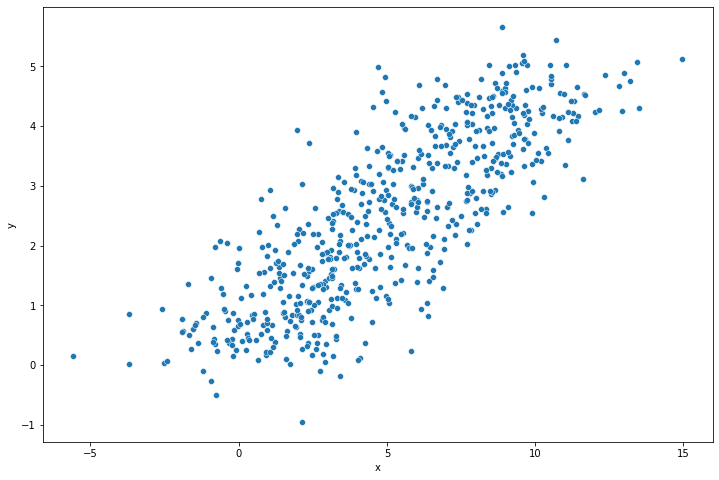

In [2]:
# seed to follow along
np.random.seed(1234)

# generate 1000 data points
N = np.arange(1000)

# helper function for this data
vary = lambda v: np.random.choice(np.arange(v))

# create correlated, random variables
a = 2
b = 1/2
eps = np.array([norm(0, vary(50)).rvs() for n in N])
y = (a + b*N + eps) / 100                         
x = (N + norm(10, vary(250)).rvs(len(N))) / 100
 
# add missing values
y[binom(1, 0.4).rvs(len(N)) == 1] = np.nan

#convert to dataframe
df = pd.DataFrame({"y": y, "x": x})

#plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", data=df)
plt.show()

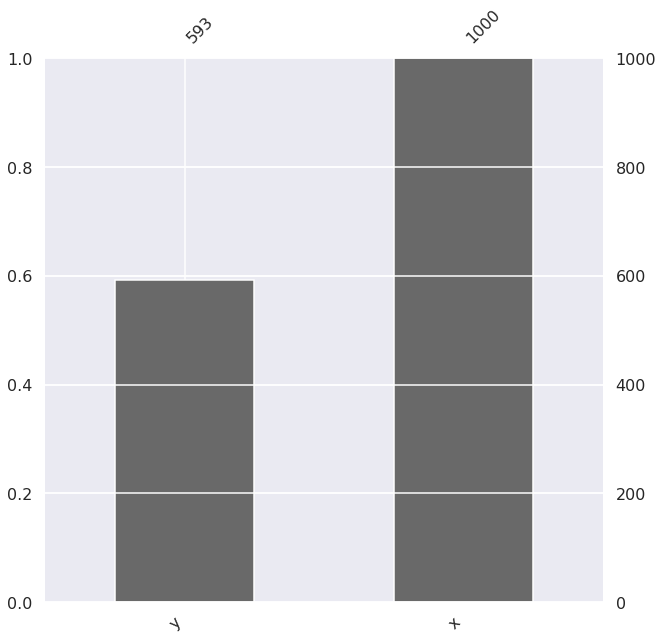

In [3]:
plot_md_percent(df, figsize=(10,10))

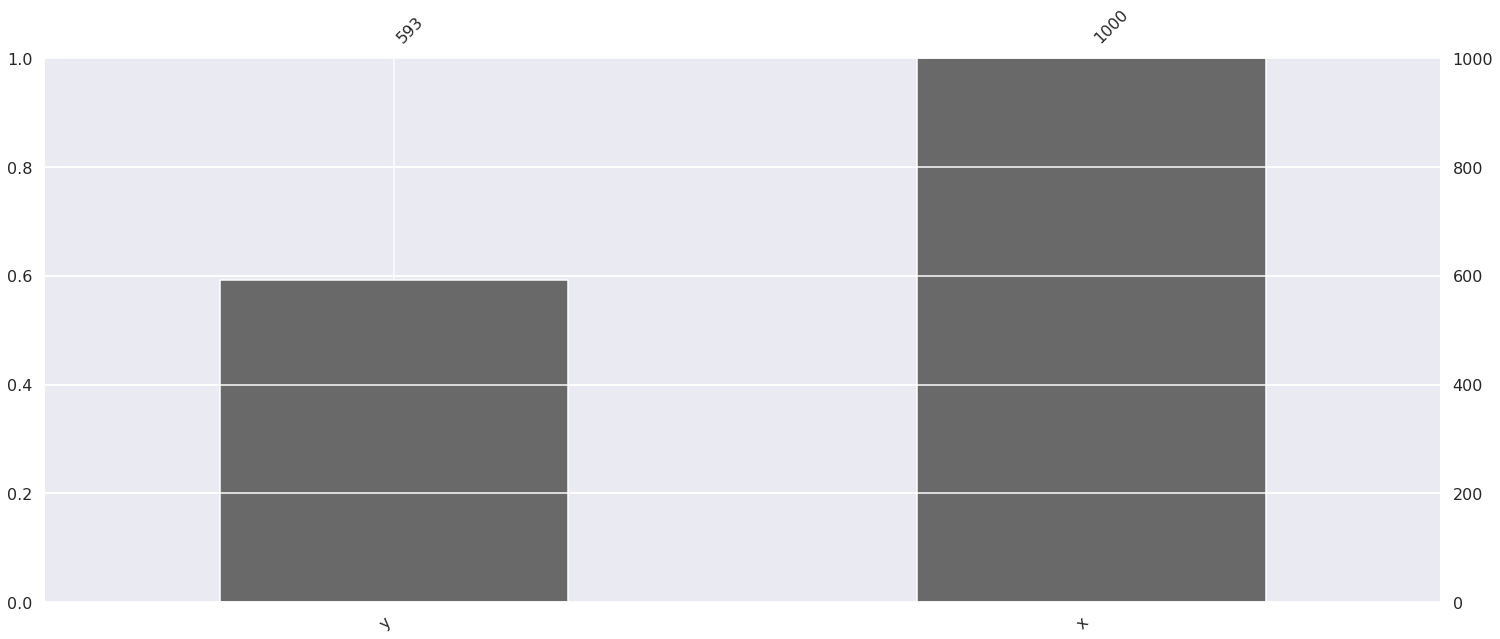

In [4]:
plot_md_percent(df)

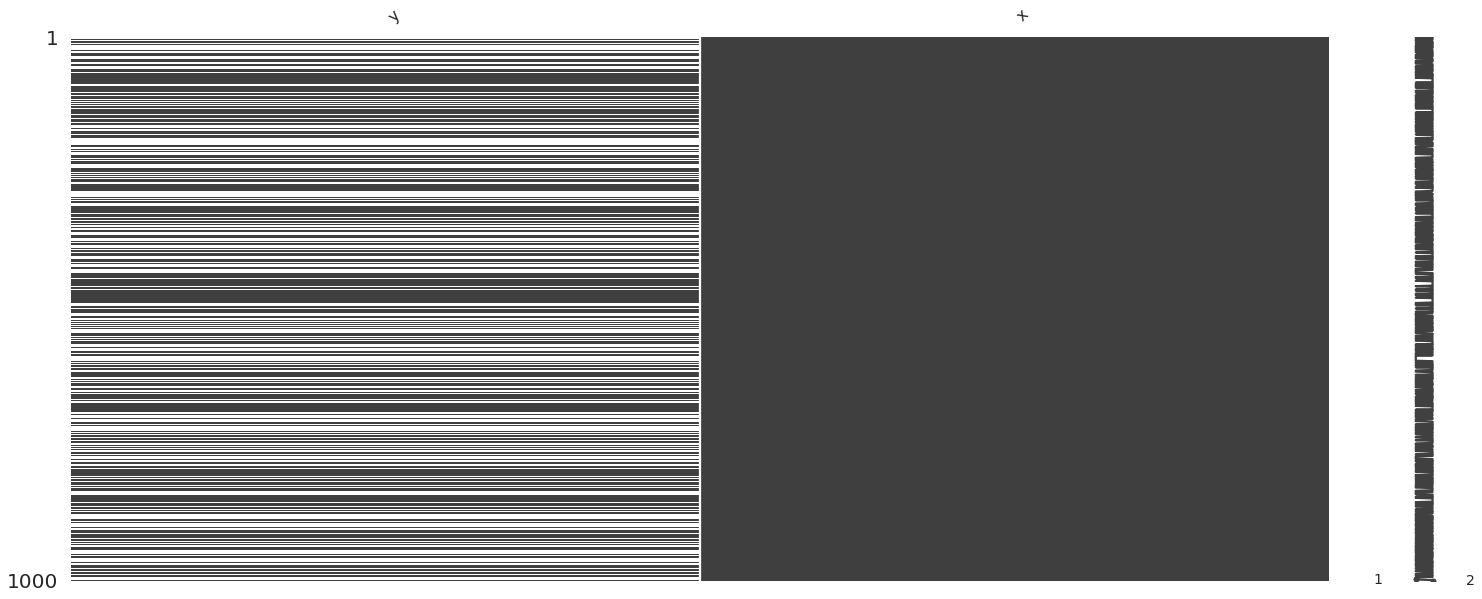

In [5]:
plot_md_locations(df)

In [6]:
mi_mean = MultipleImputer(
    strategy="mean", n=5, return_list=True, seed=101
)

# print the mean imputer to console
print(mi_mean)

# perform mean imputation procedure
imp_mean = mi_mean.fit_transform(df)

MultipleImputer(return_list=True, seed=101, strategy='mean')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

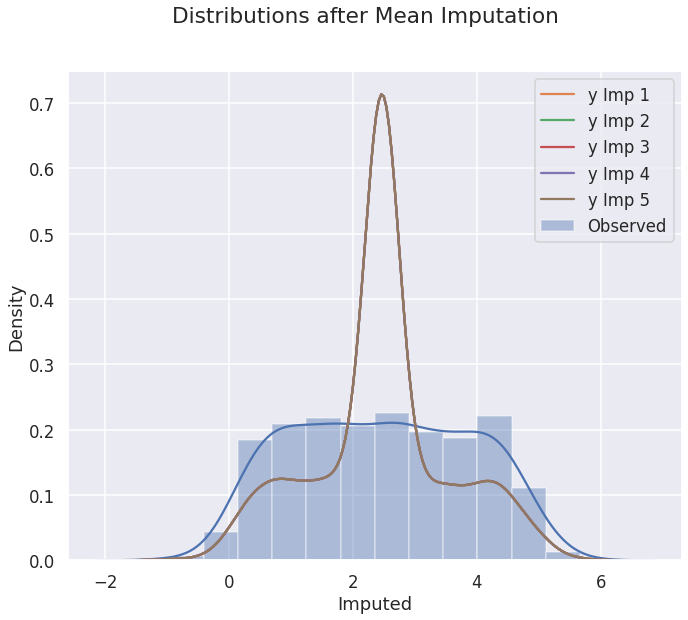

In [7]:
# distribution plot for mean imputation
plot_imp_dists(
    d=imp_mean,
    mi=mi_mean, 
    imp_col="y",
    title="Distributions after Mean Imputation",
    separate_observed=False,
    hist_observed=True, 
    figsize=(11, 9)
)

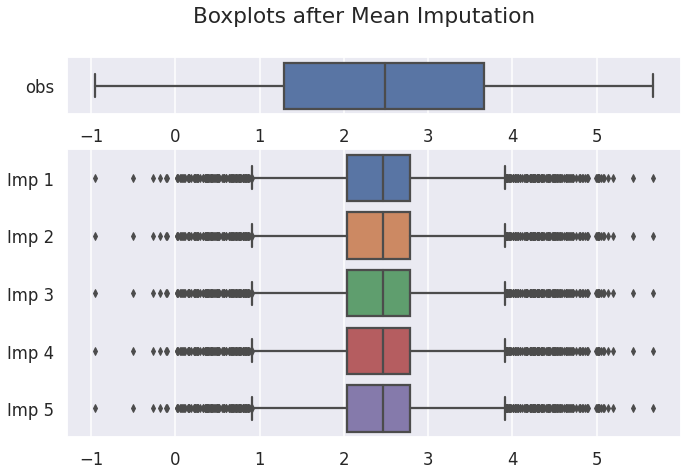

In [8]:
# box plot for mean imputation
plot_imp_boxplots(
    d=imp_mean,
    mi=mi_mean,
    imp_col="y",
    title="Boxplots after Mean Imputation", 
    figsize=(11, 7)
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


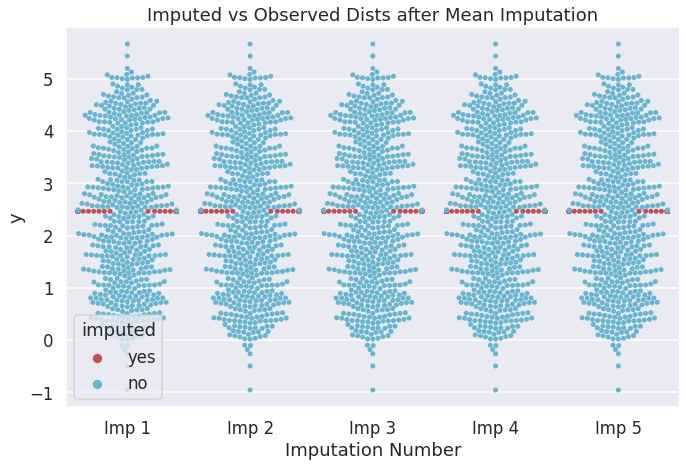

In [9]:
# swarm plot for mean imputation
plot_imp_swarm(
    d=imp_mean,
    mi=mi_mean,
    imp_col="y",
    title="Imputed vs Observed Dists after Mean Imputation", 
    figsize=(11, 7)
)

In [10]:
# create the PMM imputer
mi_pmm = MultipleImputer(
    strategy="pmm", n=5, return_list=True, seed=101
)

# perform PMM imputation procedure
imp_pmm = mi_pmm.fit_transform(df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

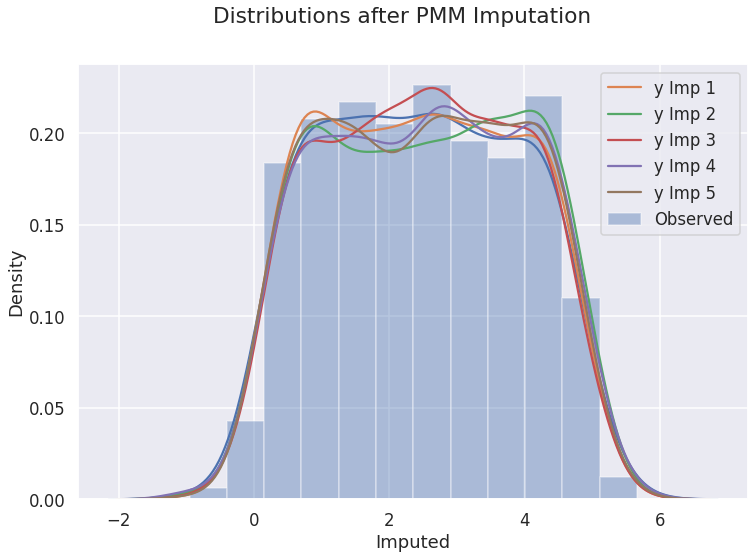

In [11]:
# distribution plot for PMM imputation
plot_imp_dists(
    d=imp_pmm,
    mi=mi_pmm, 
    imp_col="y",
    title="Distributions after PMM Imputation",
    separate_observed=False,
    hist_observed=True,
    hist_imputed=False
)

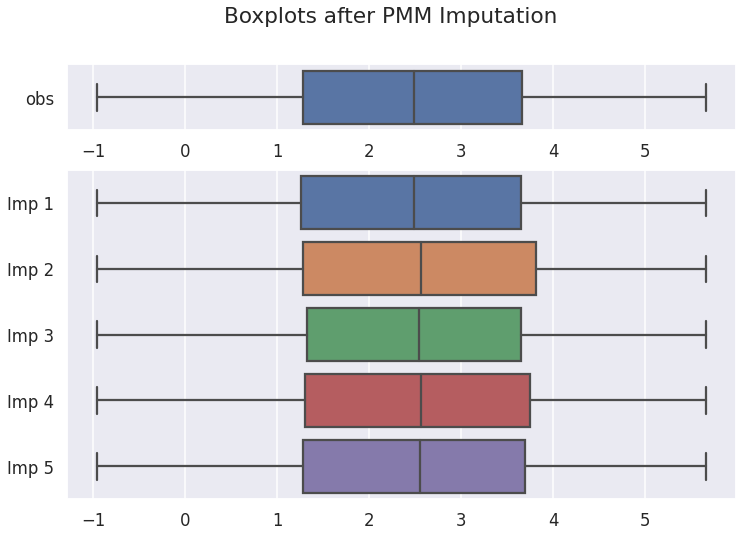

In [12]:
# box plot for PMM imputation
plot_imp_boxplots(
    d=imp_pmm,
    mi=mi_pmm,
    imp_col="y",
    title="Boxplots after PMM Imputation"
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.9% of the points cannot be placed; you m

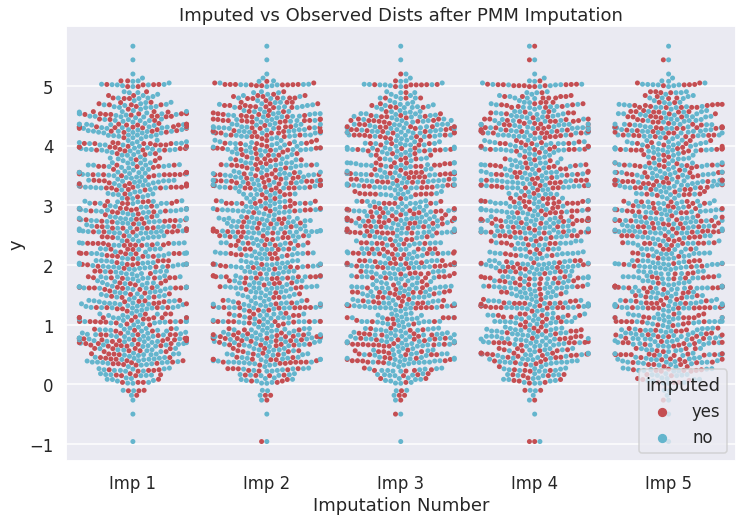

In [13]:
# swarm plot for PMM imputation
plot_imp_swarm(
    d=imp_pmm,
    mi=mi_pmm,
    imp_col="y",
    title="Imputed vs Observed Dists after PMM Imputation"
)